In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary

In [3]:
from src.models.modules.patch_embedding import PatchEmbedding
from src.models.modules.multi_head_attention import MultiHeadAttention
from src.models.modules.transformer_encoder_block import TransformerEncoderBlock
from src.models.modules.ViT import ViT

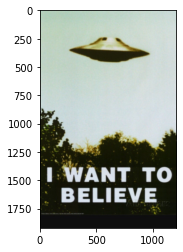

In [4]:
sample_img_path = "/home/gsoykan20/Desktop/self_development/ViT-PyTorch-implementation/data/sample_data/i_want_to_believe.jpg"
img = Image.open(sample_img_path)
fig = plt.figure()
plt.imshow(img)

In [5]:
# resize to imagenet size
transform = Compose([Resize((224, 224)), ToTensor()])
x = transform(img)
x = x.unsqueeze(0) # add batch dim
x.shape

torch.Size([1, 3, 224, 224])

In [6]:
patch_embedding = PatchEmbedding()(x)
print(patch_embedding.size())

torch.Size([1, 197, 512])


In [7]:
mha_result = MultiHeadAttention()(patch_embedding)
print(mha_result.size())

torch.Size([1, 197, 512])


In [8]:
encoder_res = TransformerEncoderBlock()(patch_embedding)
print(encoder_res.shape)

torch.Size([1, 197, 512])


In [9]:
vit = ViT().to('cuda').eval()

In [11]:
vit_res = vit(x.to('cuda'))
print(vit_res.size())

torch.Size([1, 100])


In [12]:
summary(vit, (3, 224, 224), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         Rearrange-1             [-1, 196, 768]               0
            Linear-2             [-1, 196, 768]         590,592
    PatchEmbedding-3             [-1, 197, 768]               0
         LayerNorm-4             [-1, 197, 768]           1,536
            Linear-5            [-1, 197, 2304]       1,771,776
           Dropout-6          [-1, 8, 197, 197]               0
            Linear-7             [-1, 197, 768]         590,592
MultiHeadAttention-8             [-1, 197, 768]               0
           Dropout-9             [-1, 197, 768]               0
      ResidualAdd-10             [-1, 197, 768]               0
        LayerNorm-11             [-1, 197, 768]           1,536
           Linear-12            [-1, 197, 3072]       2,362,368
             GELU-13            [-1, 197, 3072]               0
          Dropout-14            [-1, 19